## Install and Import Necessary Libraries

In [1]:
# Pip install.
!pip install ultralytics==8.0.196
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida

In [2]:
# Import necessary libraries.
from IPython import display
from ultralytics import YOLO, checks
from IPython.display import Image
from roboflow import Roboflow
import glob
import os
import random

## Before You Start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [3]:
!nvidia-smi

Tue Feb 20 15:55:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [4]:
HOME = os.getcwd()
print(HOME)

/content


## Initialization

In [5]:
# Clear the output to maintain a clean workspace.
display.clear_output()

# Perform checks using the ultralytics library.
checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 26.5/166.8 GB disk)


In [6]:
# Create a directory for datasets if it doesn't exist.
!mkdir {HOME}/datasets

# Navigate to the datasets directory.
%cd {HOME}/datasets

# Initialize Roboflow and download the dataset.
rf = Roboflow(api_key="VWSCEQrXBqZ0RQBWkwCS")
project = rf.workspace("sds-379r").project("atta-leafcutter-ants-object-detection")
dataset = project.version(9).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Atta-Leafcutter-Ants-Object-Detection-9 in yolov8:: 100%|██████████| 11780/11780 [00:01<00:00, 6537.27it/s]


## Custom Training with YOLOv8

In [7]:
%cd {HOME}

# Train the YOLOv8 model on the custom dataset.
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 383MB/s]
New https://pypi.org/project/ultralytics/8.1.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

In [8]:
# List the contents in the training directory to verify.
!ls {HOME}/runs/detect/train/

args.yaml					   PR_curve.png		  val_batch0_pred.jpg
confusion_matrix_normalized.png			   R_curve.png		  val_batch1_labels.jpg
confusion_matrix.png				   results.csv		  val_batch1_pred.jpg
events.out.tfevents.1708444589.84efa9d40a05.771.0  results.png		  val_batch2_labels.jpg
F1_curve.png					   train_batch0.jpg	  val_batch2_pred.jpg
labels_correlogram.jpg				   train_batch1.jpg	  weights
labels.jpg					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg


/content


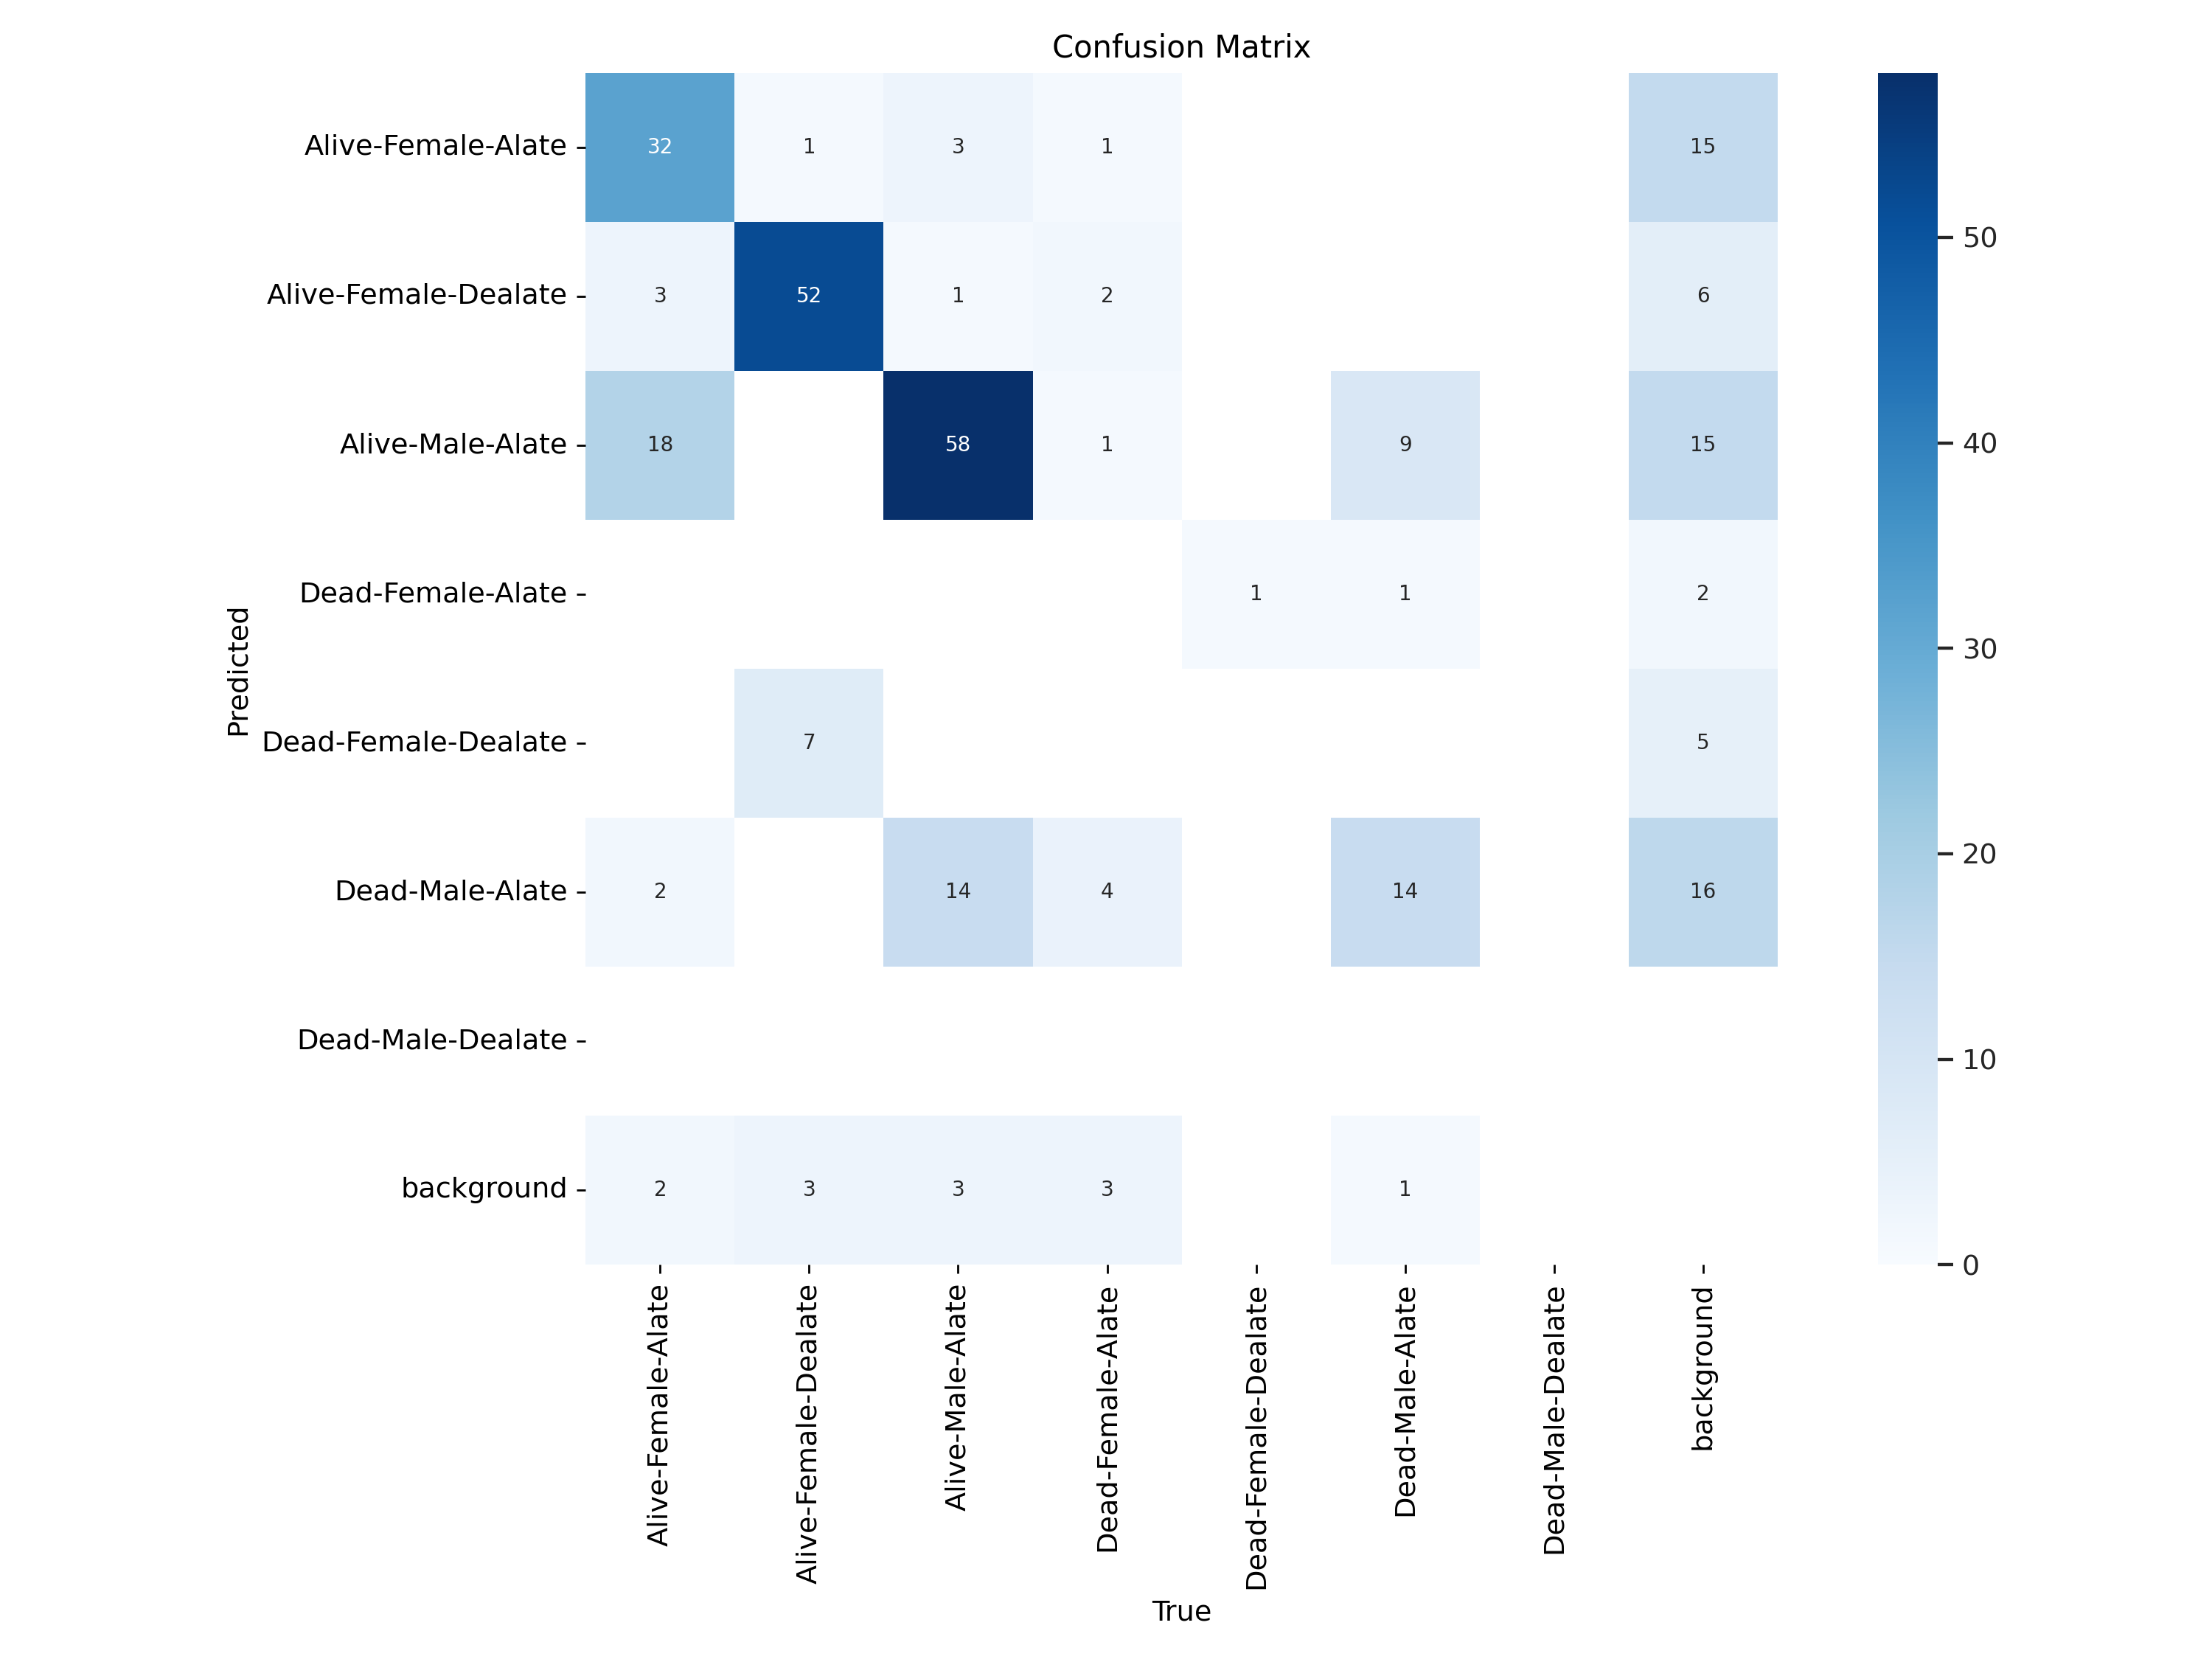

In [9]:
%cd {HOME}

# Display the confusion matrix image from the training results.
# The confusion matrix helps visualize the performance of the model,
# showing the true vs. predicted labels for each class.
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


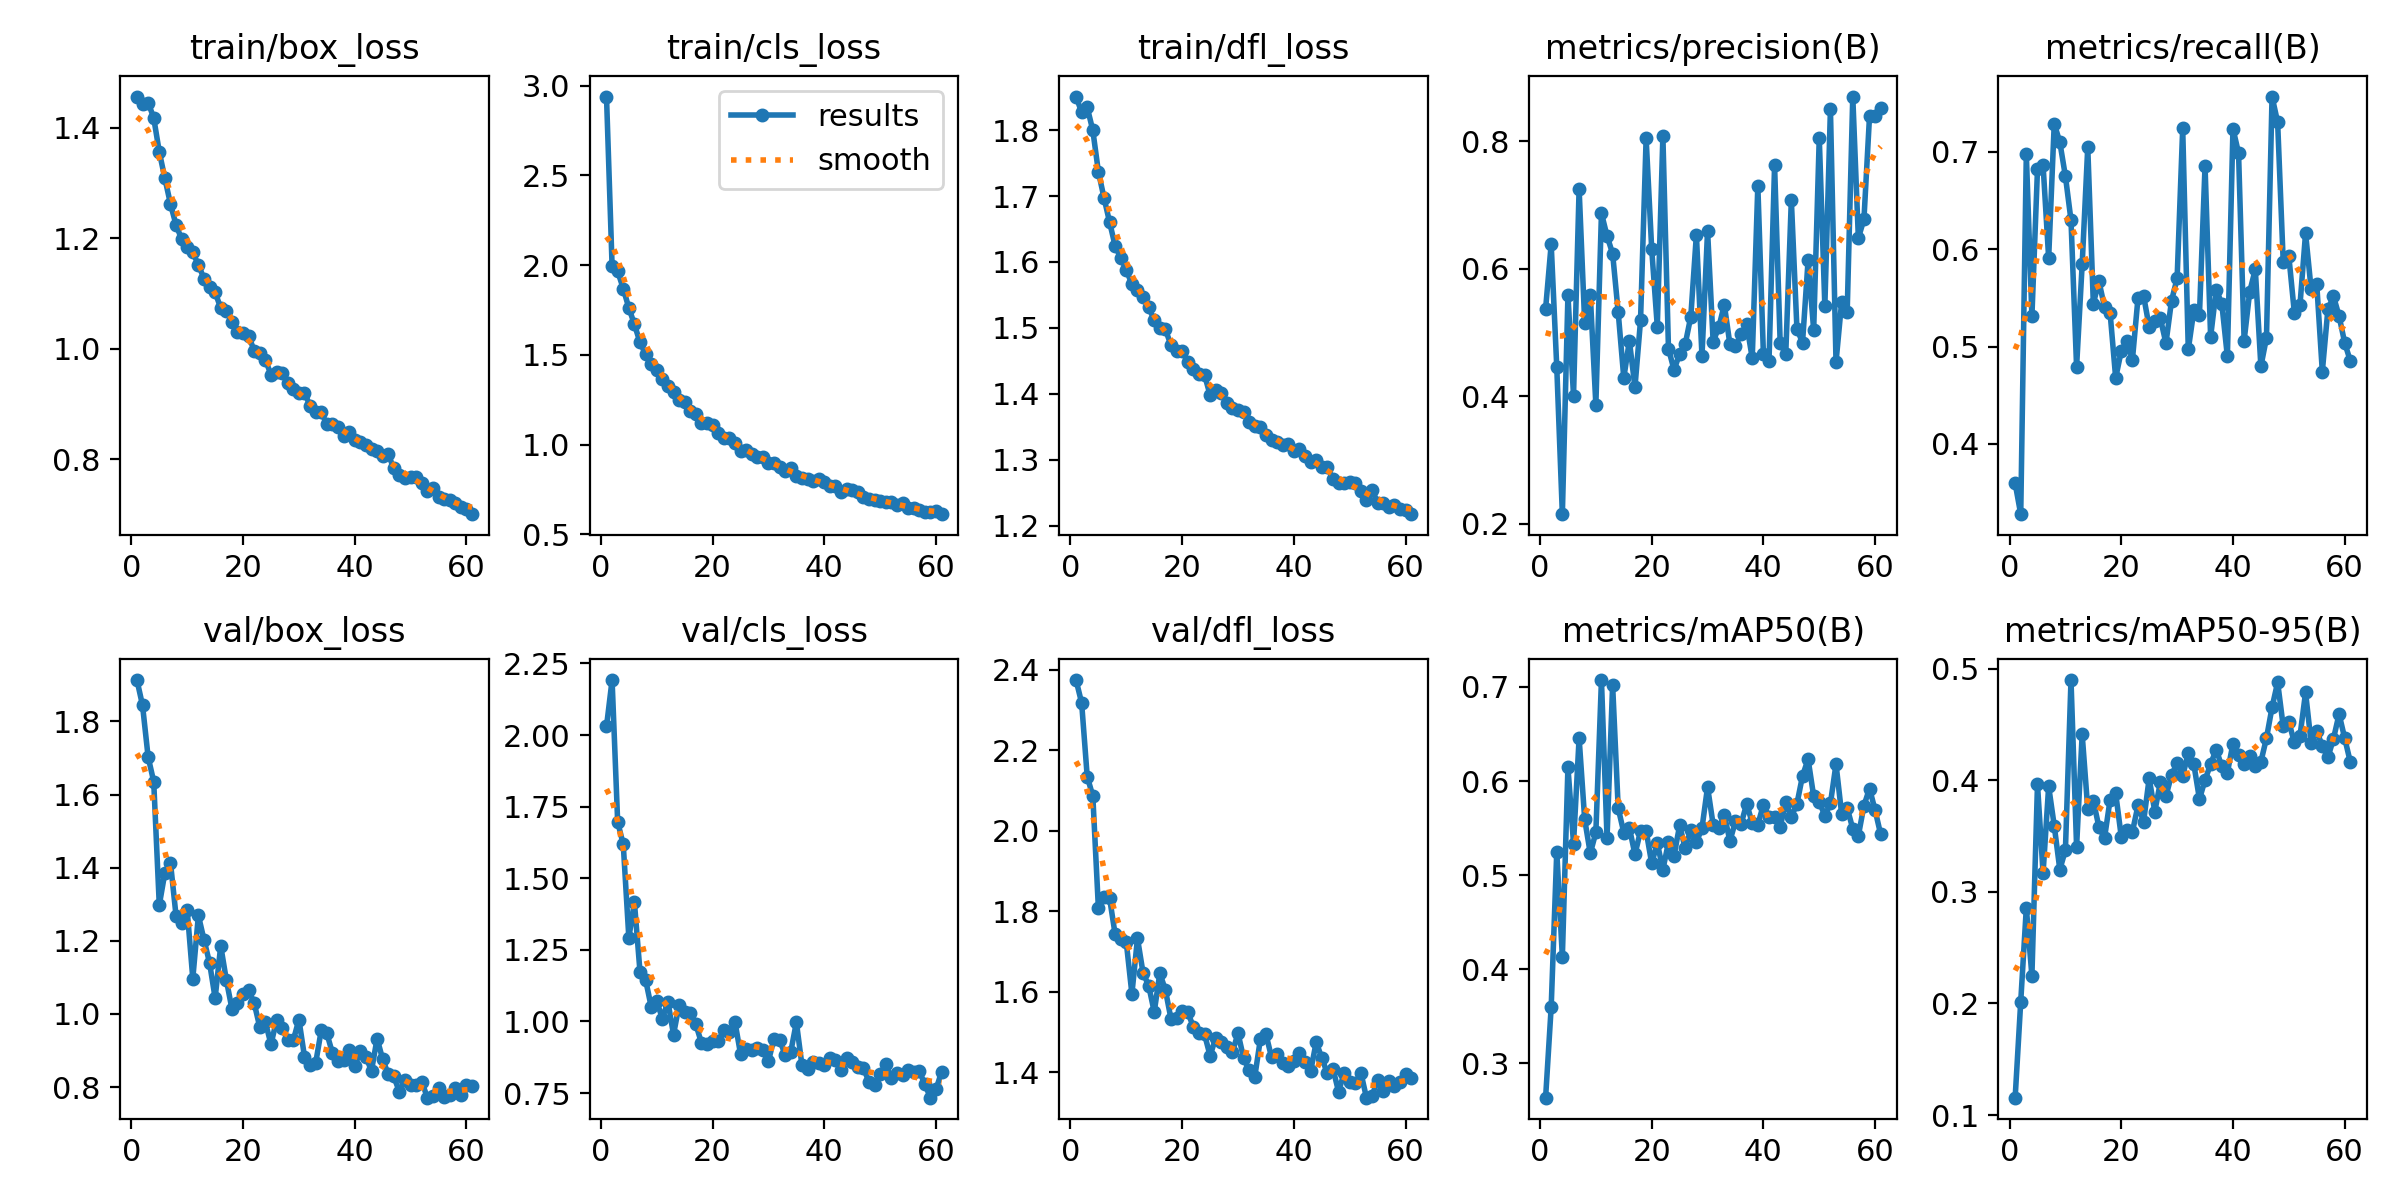

In [10]:
%cd {HOME}

# Display the results image from the training.
# This image typically includes various metrics such as precision, recall, and mAP (mean Average Precision)
# plotted over the course of the training epochs.
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


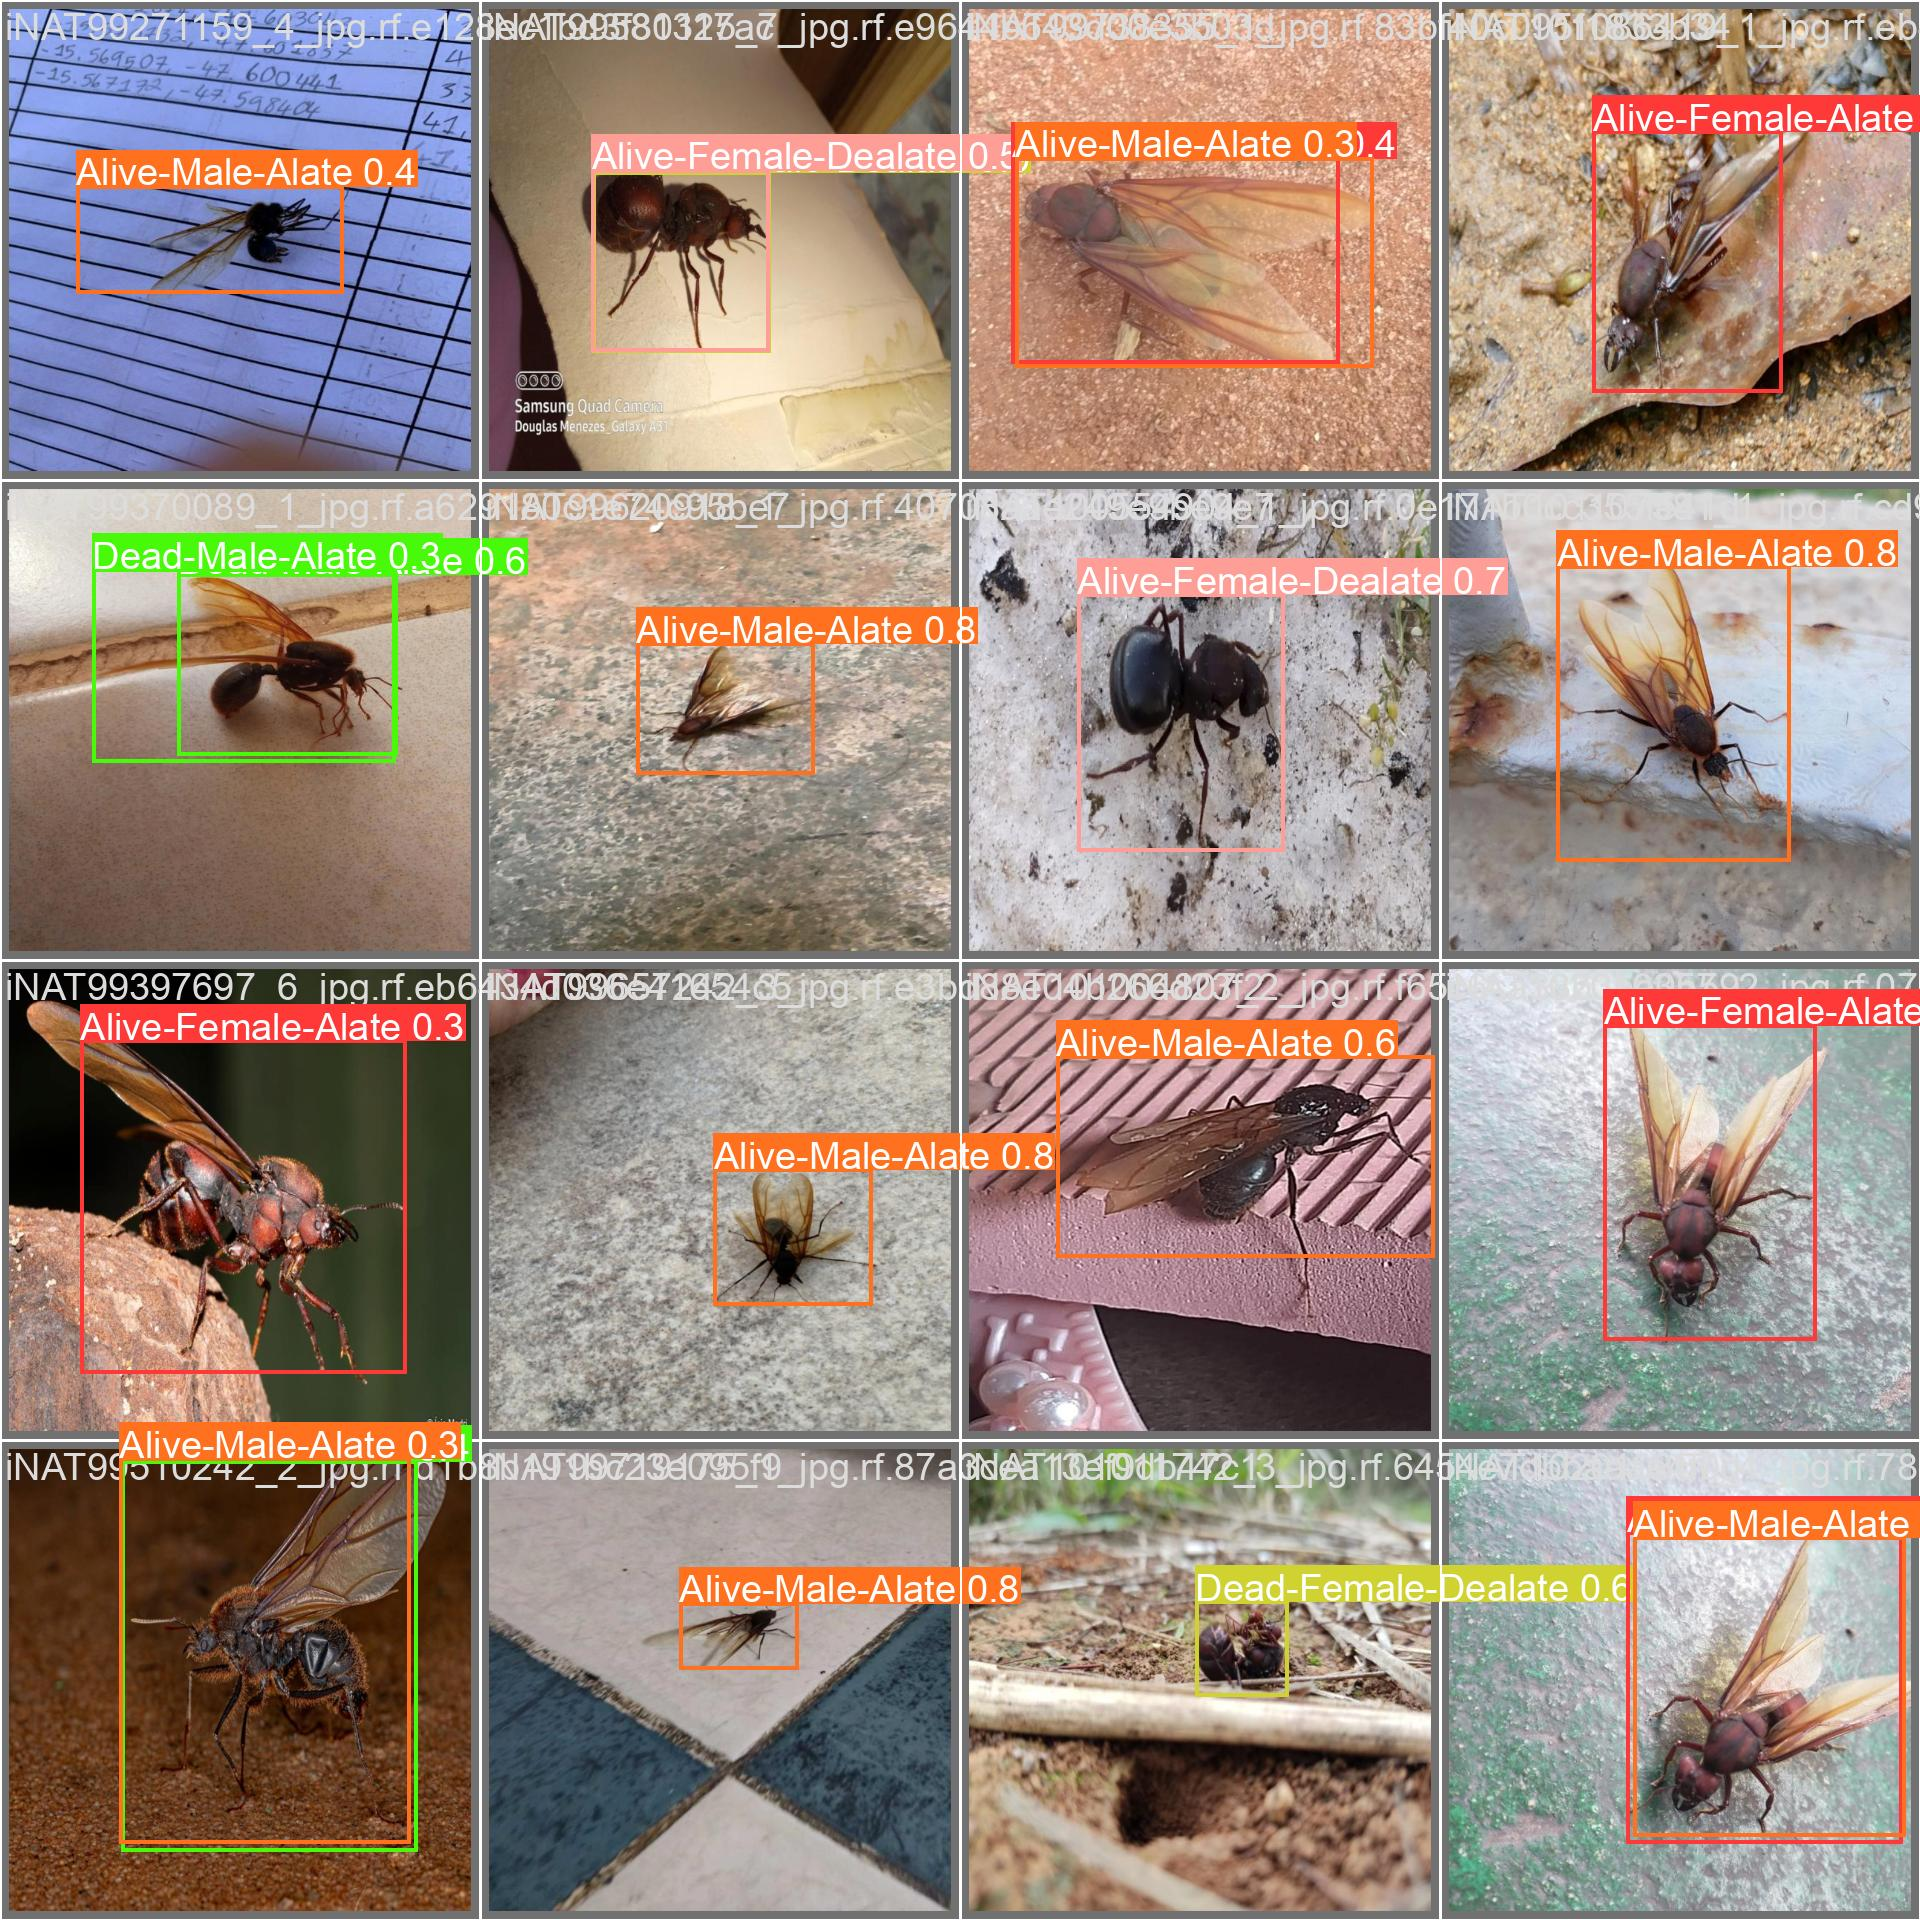

In [11]:
%cd {HOME}

# Display an example of predictions on a validation batch.
# This image shows the model's predictions on a batch of validation images,
# allowing you to visually assess how well the model is performing on unseen data.
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

# Validate the custom-trained model.
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/valid/labels.cache... 227 images, 2 backgrounds, 0 corrupt: 100% 227/227 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:04<00:00,  3.19it/s]
                   all        227        236      0.691      0.631       0.71       0.49
    Alive-Female-Alate        227         57      0.805      0.544      0.758      0.527
  Alive-Female-Dealate        227         63      0.914      0.873       0.95      0.541
      Alive-Male-Alate        227         79      0.768      0.759       0.81      0.583
     Dead-Female-Alate        227         11          1          0      0.219      0.137
   Dead-Female-Dealate        227          1       0.12          1      0.99

## Inference with Custom Model

In [13]:
%cd {HOME}

# Inference with the custom-trained model.
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

image 1/113 /content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/test/images/iNAT100097915_1_jpg.rf.d4370ab81d8cca2ff2acefc0f2840335.jpg: 800x800 1 Alive-Female-Dealate, 7.8ms
image 2/113 /content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/test/images/iNAT100711703_3_jpg.rf.8c108a0217278612450a14f0b4c2ccb1.jpg: 800x800 1 Alive-Female-Alate, 1 Alive-Male-Alate, 8.2ms
image 3/113 /content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/test/images/iNAT13296572_1_jpg.rf.c79f260022b10adce42fb420dd9e55a4.jpg: 800x800 1 Alive-Female-Dealate, 7.8ms
image 4/113 /content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/test/images/iNAT13547777_5_jpg.rf.dcbb727a515715428b6edca28fe1e067.jpg: 800x800 1 Alive-Female-Alate, 1 Alive-Male-Alate, 7.9ms
image 5/113 /content/datasets/Atta-Leafcutter-Ants

In [17]:
# Display a few prediction results.
for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once the YOLOv8 model has finished training, a set of trained weights will be ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of the project. The model weights can be uploaded to Roboflow Deploy, so that the trained weights can be used on Roboflow's infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section:

In [15]:
# Deploy the trained model on Roboflow.
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [16]:
# Load the deployed model for inference.
model = project.version(dataset.version).model

# Perform inference on a random image from the test set.
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on iNAT83084682_1_jpg.rf.1b55267bbdf5d08d4c43872075b66c5c.jpg


{'predictions': [{'x': 251.5,
   'y': 333.5,
   'width': 135.0,
   'height': 83.0,
   'confidence': 0.7704954743385315,
   'class': 'Alive-Male-Alate',
   'class_id': 2,
   'detection_id': '23379e48-4b9c-4845-8d33-b0aad82b94d3',
   'image_path': '/content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/test/images/iNAT83084682_1_jpg.rf.1b55267bbdf5d08d4c43872075b66c5c.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 516.0,
   'y': 347.0,
   'width': 120.0,
   'height': 78.0,
   'confidence': 0.6177555322647095,
   'class': 'Alive-Female-Alate',
   'class_id': 0,
   'detection_id': '7d407f6b-2559-4842-b883-95aeab964128',
   'image_path': '/content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/test/images/iNAT83084682_1_jpg.rf.1b55267bbdf5d08d4c43872075b66c5c.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

## Download Content Files of YOLOv8

In [22]:
# Zip 'datasets' and 'runs' directories.
!zip -r /content/datasets.zip /content/datasets
!zip -r /content/runs.zip /content/runs

# Download the zip files.
from google.colab import files
files.download('/content/datasets.zip')
files.download('/content/runs.zip')

# Download the individual model files.
files.download('/content/yolov8n.pt')
files.download('/content/yolov8s.pt')

Streaming output truncated to the last 5000 lines.
  adding: content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/train/labels/iNAT53603389_4_jpg.rf.4ba9a304dc025f51cb40958904648163.txt (deflated 25%)
  adding: content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/train/labels/iNAT72208924_3_jpg.rf.3cac191214bd55ed578f06380cc416d7.txt (deflated 21%)
  adding: content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/train/labels/iNAT13142288_2_jpg.rf.e3318e57214d8e263ba2ed151a40de58.txt (deflated 12%)
  adding: content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/train/labels/iNAT48185081_1_jpg.rf.b9c894346203cbf3409bcfd34367c610.txt (deflated 31%)
  adding: content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/train/labels/iNAT65864957_7_jpg.rf.73d73907d61238a1b35a2d4c3fc333b1.txt (deflated 28%)
  adding: content/datasets/Atta-Leafcutter-Ants-Object-Detection-9/train/labels/iNAT22822818_2_jpg.rf.cb2158e9c531f984f5516db9e645f04f.txt (deflated 22%)
  adding: content/dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>